# Árvore de decisão e árvores murchas
Esse modelo verifica se, segundo algumas características, estão saudáveis ou não

In [ ]:
from scipy.io import arff
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import Image


## Treinando o modelo

### Baixando o dataset

Descomente esse código caso estejas no google colab

In [ ]:
# !pip install wget
# !wget https://raw.githubusercontent.com/plorazxi/Inteligencia-computacional/refs/heads/main/Decision-tree/withered-trees/Dataset.arff

### Carregando o dataset

In [20]:
data, meta = arff.loadarff("Dataset.arff")
df = pd.DataFrame(data)

df.head(5)

,V1,V2,V3,V4,V5,Class
0,120.362774,205.500000,119.395349,416.581395,20.676318,b'2'
1,124.739583,202.800000,115.333333,354.333333,16.707151,b'2'
2,134.691964,199.285714,116.857143,477.857143,22.496712,b'2'
3,127.946309,178.368421,92.368421,278.473684,14.977453,b'2'
4,135.431548,197.000000,112.690476,532.952381,17.604193,b'2'


In [21]:
df['Class'] = df['Class'].replace({b'1': 'Doentes', b'2': 'Saudáveis'})
df.head(5)

,V1,V2,V3,V4,V5,Class
0,120.362774,205.500000,119.395349,416.581395,20.676318,Saudáveis
1,124.739583,202.800000,115.333333,354.333333,16.707151,Saudáveis
2,134.691964,199.285714,116.857143,477.857143,22.496712,Saudáveis
3,127.946309,178.368421,92.368421,278.473684,14.977453,Saudáveis
4,135.431548,197.000000,112.690476,532.952381,17.604193,Saudáveis


### Processando Dataset

In [22]:
target = df["Class"].values
features = df[["V1", "V2", "V3", "V4", "V5"]].values

print(target)
print(features)

['Saudáveis' 'Saudáveis' 'Saudáveis' ... 'Doentes' 'Doentes' 'Doentes']
[[120.362774 205.5      119.395349 416.581395  20.676318]
 [124.739583 202.8      115.333333 354.333333  16.707151]
 [134.691964 199.285714 116.857143 477.857143  22.496712]
 ...
 [119.076687 247.95122  113.365854 808.02439   24.830059]
 [107.944444 197.        90.       451.         8.214887]
 [119.731928 182.238095  74.285714 301.690476  22.944278]]


In [23]:
features_treino, features_test, target_treino, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Criando algoritmo e treinando modelo

In [27]:
algoritmo = DecisionTreeClassifier(criterion='entropy', max_depth=5)
modelo = algoritmo.fit(features_treino, target_treino)

## Mostrando como o modelo ficou

[0.00516749 0.32747075 0.61375411 0.05360765 0.        ]


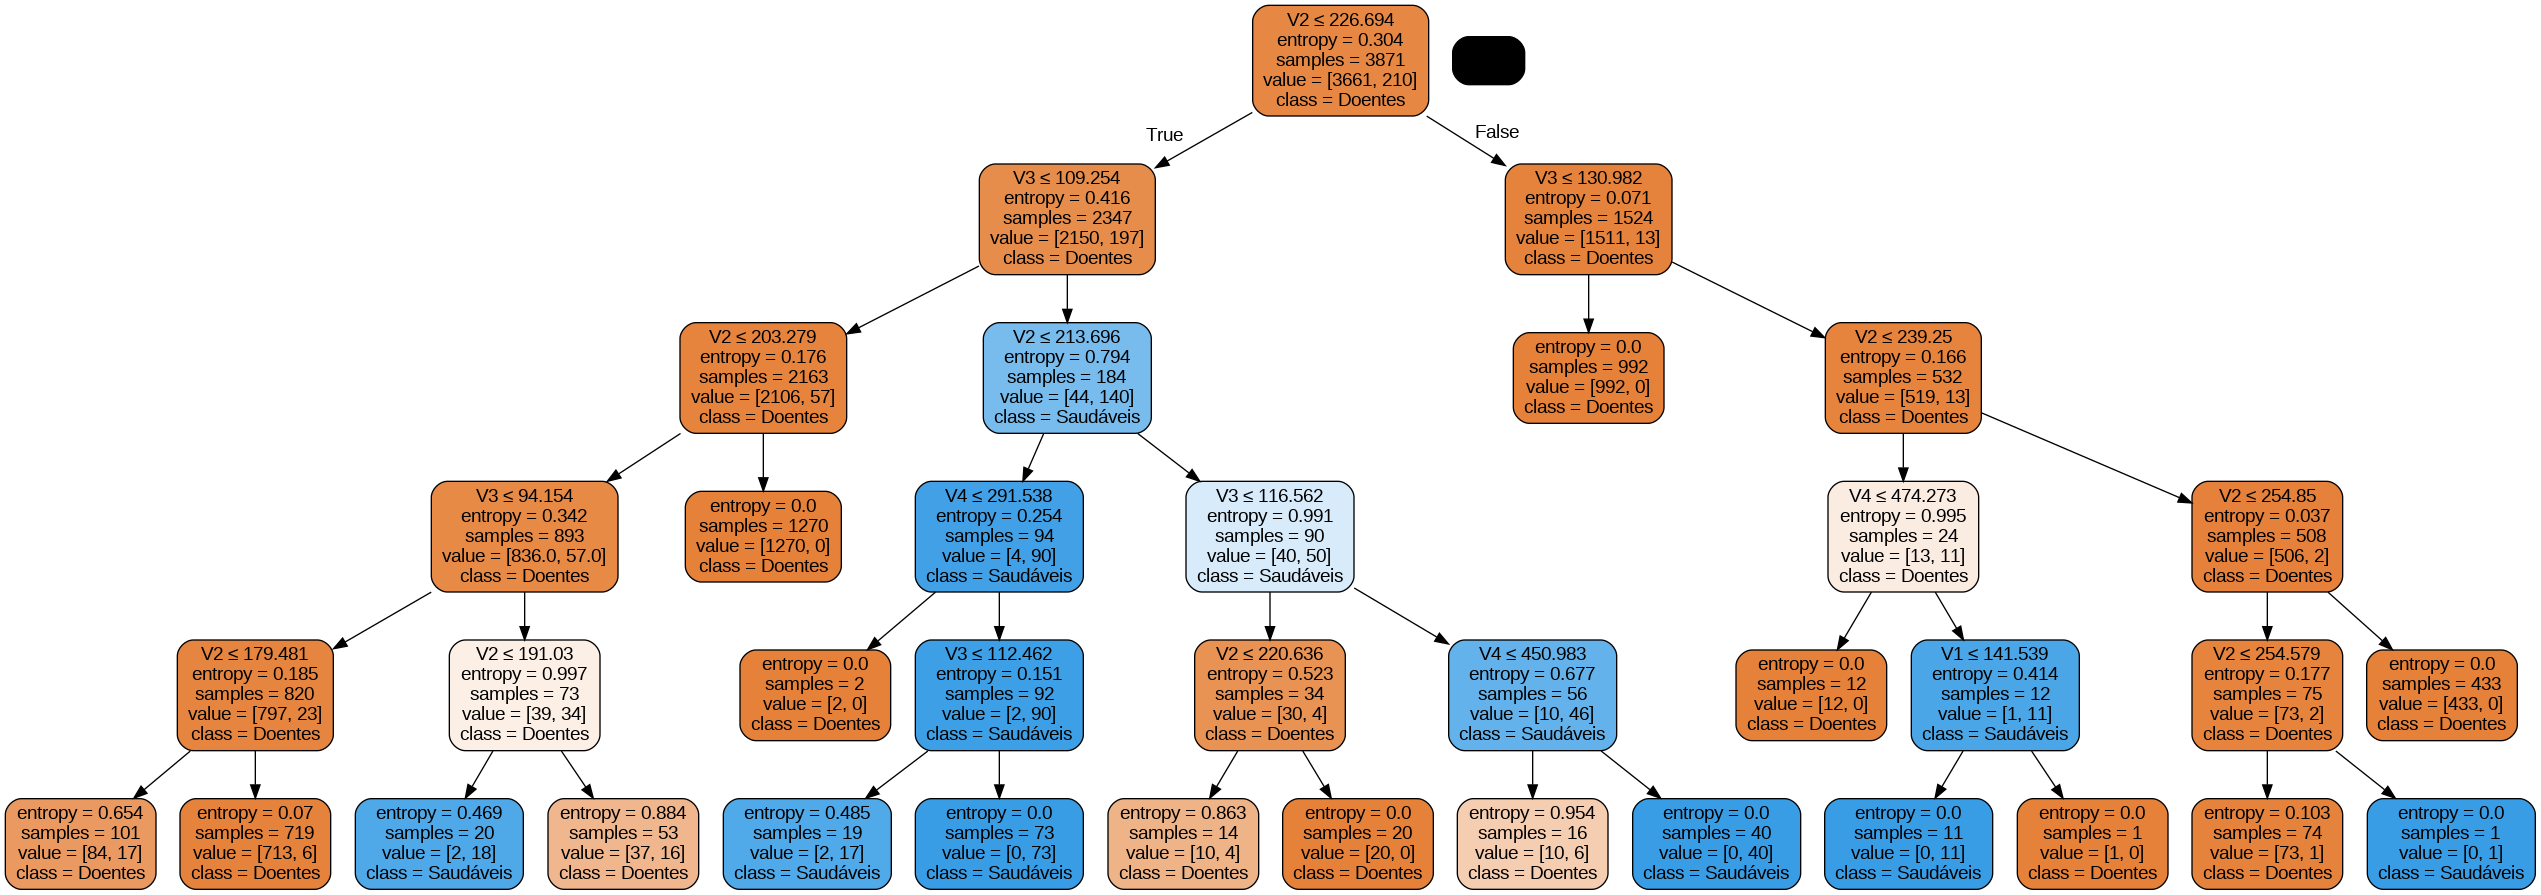

In [28]:
print (modelo.feature_importances_)


nome_features = ["V1", "V2", "V3", "V4", "V5"]
nome_classes = modelo.classes_

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

## Avaliando modelo

In [ ]:
target_predicoes = modelo.predict(features_test)

print("ACURÁCIA DA ÁRVORE: ", accuracy_score(target_test, target_predicoes))
print (classification_report(target_test, target_predicoes))

ACURÁCIA DA ÁRVORE:  0.9772727272727273
              precision    recall  f1-score   support

     Doentes       0.98      1.00      0.99       917
   Saudáveis       0.89      0.65      0.75        51

    accuracy                           0.98       968
   macro avg       0.94      0.82      0.87       968
weighted avg       0.98      0.98      0.98       968

